In [3]:
import pandas as pd
import numpy as np

In [4]:
org_x = pd.read_csv('./X_train.csv')
org_y = pd.read_csv('./y_train.csv')

X = pd.read_csv('./X_test.csv')

# Data preprocessing
I split the data into training:validation = 7:3 and normalize the data

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

sc_x = StandardScaler()
sc_x.fit(org_x)
X_std = sc_x.fit_transform(org_x)
y = org_y['FGM'].values



X_train, X_test, Y_train, Y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=0)

### AdaBoost with hyperparamerter tuning
The loss fluctuate, yet the model is quiet complex when the number of estimators grows.
So I decided not to use AdaBoost.


 [N_est = 100]
Error  test: 0.3879, train: 0.3815
Accuracy test: 0.6121, train: 0.6185

 [N_est = 120]
Error  test: 0.3875, train: 0.3805
Accuracy test: 0.6125, train: 0.6195

 [N_est = 140]
Error  test: 0.3870, train: 0.3800
Accuracy test: 0.6130, train: 0.6200

 [N_est = 160]
Error  test: 0.3876, train: 0.3797
Accuracy test: 0.6124, train: 0.6203

 [N_est = 180]
Error  test: 0.3874, train: 0.3797
Accuracy test: 0.6126, train: 0.6203

 [N_est = 200]
Error  test: 0.3872, train: 0.3796
Accuracy test: 0.6128, train: 0.6204

 [N_est = 220]
Error  test: 0.3868, train: 0.3797
Accuracy test: 0.6132, train: 0.6203

 [N_est = 240]
Error  test: 0.3875, train: 0.3796
Accuracy test: 0.6125, train: 0.6204

 [N_est = 260]
Error  test: 0.3879, train: 0.3793
Accuracy test: 0.6121, train: 0.6207

 [N_est = 280]
Error  test: 0.3872, train: 0.3793
Accuracy test: 0.6128, train: 0.6207

 [N_est = 300]
Error  test: 0.3870, train: 0.3794
Accuracy test: 0.6130, train: 0.6206

 [N_est = 320]
Error  test: 0.3

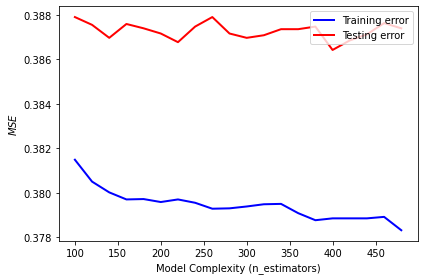

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

train_error = []
test_error = []

e = range(100, 500, 20)

for idx, est in enumerate(e): 
    clf = AdaBoostClassifier(n_estimators=est, random_state=0)
    clf.fit(X_train, Y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_error.append(mean_squared_error(Y_train, y_train_pred))
    test_error.append(mean_squared_error(Y_test, y_test_pred))
    print('\n [N_est = %d]' %est)
    print('Error  test: %.4f, train: %.4f'%(test_error[idx], train_error[idx]))
    print('Accuracy test: %.4f, train: %.4f'%(clf.score(X_test, Y_test), clf.score(X_train, Y_train)))
    
plt.plot(e, train_error, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(e, test_error, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.show()

### RidgeClassifier with hyperparamerter tuning

As we can see, the model overfit, and degree=2 will be a good setting

0.607963348604748

[Degree = 1.0000]
prediction train: 0.6080, test: 0.6097
0.6176926280716368

[Degree = 2.0000]
prediction train: 0.6177, test: 0.6149
0.6188921282798834

[Degree = 3.0000]
prediction train: 0.6189, test: 0.6137
0.6213411078717201

[Degree = 4.0000]
prediction train: 0.6213, test: 0.6106


/home/haowei/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.07041e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.6282382340691378

[Degree = 5.0000]
prediction train: 0.6282, test: 0.6085


/home/haowei/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.64233e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.6389670970428988

[Degree = 6.0000]
prediction train: 0.6390, test: 0.6009


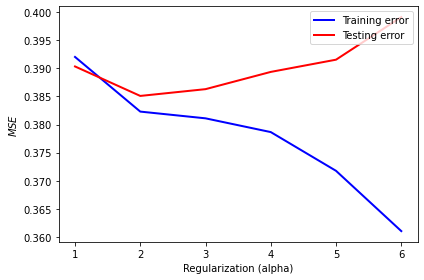

In [4]:
train_error = []
test_error = []

MAX_DEGREE = 7

for a in range(1, MAX_DEGREE):
    poly = PolynomialFeatures(degree=a)
    X_poly = poly.fit_transform(X_std)
    
    x_train, x_valid, y_train, y_valid = train_test_split(
        X_poly, y, test_size=0.3, random_state=0)

    rg_cl = RidgeClassifier(alpha=0.1).fit(x_train, y_train)
    print(rg_cl.score(x_train, y_train) )

    y_train_acc = rg_cl.score(x_train, y_train)
    y_valid_acc = rg_cl.score(x_valid, y_valid)
    
    y_train_pred = rg_cl.predict(x_train)
    y_valid_pred = rg_cl.predict(x_valid)
    
    train_error.append(mean_squared_error(y_train, y_train_pred))
    test_error.append(mean_squared_error(y_valid, y_valid_pred))
    
    

    print('\n[Degree = %.4f]' % a )
    print('prediction train: %.4f, test: %.4f' % (y_train_acc
                   ,
                    y_valid_acc))
    
plt.plot(range(1, MAX_DEGREE), train_error, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, MAX_DEGREE), test_error, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Regularization (alpha)')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.show()

### Random Forest Classifier with hyperparamerter tuning

Random Forest Classifier is the best model with Error on testing: 0.38, training: 0.36 and
accuracy on testing: 0.62, training: 0.64
Based on the experience below, depth=9 will be suitable for this task.

Again, the model slightly overfit when the depth of tree increase.


 [Depth = 1]
Error  test: 0.4148, train: 0.4091
Accuracy test: 0.5852, train: 0.5909

 [Depth = 2]
Error  test: 0.3918, train: 0.3850
Accuracy test: 0.6082, train: 0.6150

 [Depth = 3]
Error  test: 0.3901, train: 0.3827
Accuracy test: 0.6099, train: 0.6173

 [Depth = 4]
Error  test: 0.3893, train: 0.3812
Accuracy test: 0.6107, train: 0.6188

 [Depth = 5]
Error  test: 0.3876, train: 0.3799
Accuracy test: 0.6124, train: 0.6201

 [Depth = 6]
Error  test: 0.3862, train: 0.3777
Accuracy test: 0.6138, train: 0.6223

 [Depth = 7]
Error  test: 0.3868, train: 0.3753
Accuracy test: 0.6132, train: 0.6247

 [Depth = 8]
Error  test: 0.3854, train: 0.3701
Accuracy test: 0.6146, train: 0.6299

 [Depth = 9]
Error  test: 0.3847, train: 0.3632
Accuracy test: 0.6153, train: 0.6368

 [Depth = 10]
Error  test: 0.3860, train: 0.3531
Accuracy test: 0.6140, train: 0.6469

 [Depth = 11]
Error  test: 0.3862, train: 0.3381
Accuracy test: 0.6138, train: 0.6619

 [Depth = 12]
Error  test: 0.3865, train: 0.3192
Ac

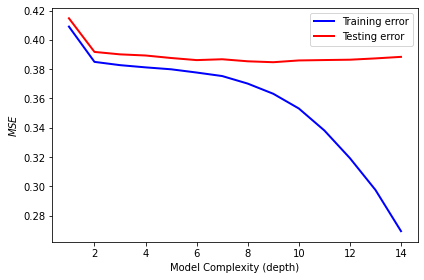

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


train_error = []
test_error = []

for depth in range(1, 15):
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, Y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_error.append(mean_squared_error(Y_train, y_train_pred))
    test_error.append(mean_squared_error(Y_test, y_test_pred))
    print('\n [Depth = %d]' %depth)
    print('Error  test: %.4f, train: %.4f'%(test_error[depth-1], train_error[depth-1]))
    print('Accuracy test: %.4f, train: %.4f'%(clf.score(X_test, Y_test), clf.score(X_train, Y_train)))
    
plt.plot(range(1, 15), train_error, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, 15), test_error, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model Complexity (depth)')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.show()

# Feature selection

I extracted the features by Lasso coeffecients. 'SHOT_CLOCK' 'CLOSE_DEF_DIST' 'SHOT_DIST' will be the top three selected features

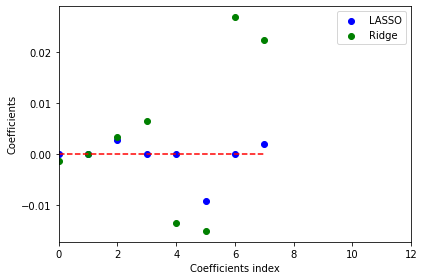

[-0.00000000e+00 -1.35560408e-06  2.72053388e-03 -0.00000000e+00
 -0.00000000e+00 -9.26921556e-03  0.00000000e+00  2.06340709e-03]
Selected attributes: ['SHOT_CLOCK' 'SHOT_DIST' 'CLOSE_DEF_DIST']


In [6]:
var_num = org_x.shape[1]

lr_lasso = Lasso(alpha = 0.1)
lr_lasso.fit(org_x, org_y)
lr_ridge = Ridge(alpha = 0.1)
lr_ridge.fit(org_x, org_y)

plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')
plt.scatter(range(var_num),lr_ridge.coef_, label = 'Ridge', color = 'green')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,12)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

epsilon = 1e-4

print(lr_lasso.coef_)
idxs = np.where(abs(lr_lasso.coef_) > epsilon)

print('Selected attributes: {}'.format(org_x.columns.values[idxs]))

### Drop the redundant fetures

In [7]:
c = org_x[['CLOSE_DEF_DIST', 'SHOT_CLOCK', 'SHOT_DIST']]
y = org_y['FGM'].values

feat_test = X[['CLOSE_DEF_DIST', 'SHOT_CLOCK', 'SHOT_DIST']]


X_train, X_test, y_train, y_test = train_test_split(
    c, y, test_size=0.3, random_state=0)

### Result after dropping features
the top accuracy drop slightly

In [8]:
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_test)
test_error = mean_squared_error(y_test, y_test_pred)
print('Error %.4f'%(test_error))
print('Accuracy %.4f'%(clf.score(X_test, y_test)))

Error 0.3884
Accuracy 0.6105


### Output the final prediction

In [9]:
import csv

clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(c, y)
pred = clf.predict(feat_test)


with open('y_pred.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['FGM'])
    for i in pred:
        writer.writerow([i])